# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Luis Fernando - FTDS 010 - Phase 1

Subject : Customer Churn Prediction

Objectives : Membuat model sehingga kita bisa memprediksi , apakah customer akan berpotensi churn (pergi untuk tidak berlangganan lagi / tidak setia) atau tidak

Sumber dataset : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets 

Nama Dataset : churn-bigml-80.csv

Jumlah Kolom : 20 kolom (termasuk 1 kolom target 'Churn (Target)')





# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix 
from imblearn.pipeline import make_pipeline,Pipeline
import pickle

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [50]:
df = pd.read_csv('../dataset/churn-bigml-80.csv')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
df_copy = df.copy()

Kita lihat info untuk masing - masing kolom pada dataset, apakah ada data yang null , hingga melihat tipe data masing - masing kolom

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Dari data di atas , telrihat bahwa tidak ada  data yang null , kemudian untuk data mayoritas bertipe data numerik, dan untuk targetnya bertipe data Boolean 

Selanjutnya, kita lihat jumlah unique values untuk masing - masing kolom , untuk menentukan mana yang merupakan unique values , mana yang bukan

In [53]:
df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

Dari tampilan di atas ,terlihat bahwa yang termasuk data kategorik adalah :
- State , Area code , International plan dan Voice mail plan 

Selanjutnya, kita lihat analisa deskriptif dari masing - masing kolom bertipe data numerik dan object

In [54]:
#analisa deskriptif numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [55]:
df.describe(include=object).T

,count,unique,top,freq
State,2666,51,WV,88
International plan,2666,2,No,2396
Voice mail plan,2666,2,No,1933


### Mapping Churn dari Boolean ke Integer

Karena target column berbentuk boolean , saya ingin mengconvert dahulu dari bool menjadi integer

In [56]:
df['Churn'] = df['Churn'].map({True:1,False:0})

# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Proporsi antara Churn Yes dan No

Kita lihat , proporsi antara Churn Yes dan No

0    2278
1     388
Name: Churn, dtype: int64

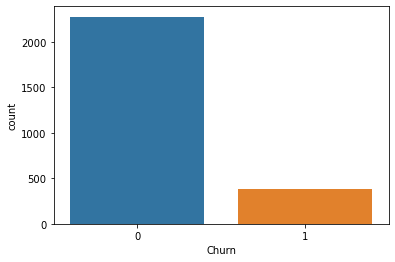

In [57]:
sns.countplot(data=df,x='Churn')
df['Churn'].value_counts()

Terlihat bahwa data terbanyak adalah Churn nya False. Sehingga, bisa diasumsikan bahwa data tersebut bersifat imbalance , sehingga perlu dihandling imbalance ini nantinya saat data sudah displit antara train dan test nya, khususnya handling imbalance pada data train agar model bisa menyikapi data yang imbalance

### Persebaran Data Numerik

Kita lihat , persebaran data numerik masing - masing kolom

In [58]:
num_columns = df.select_dtypes(exclude=object).columns.tolist()
cat_columns = df.select_dtypes(include=object).columns.tolist()

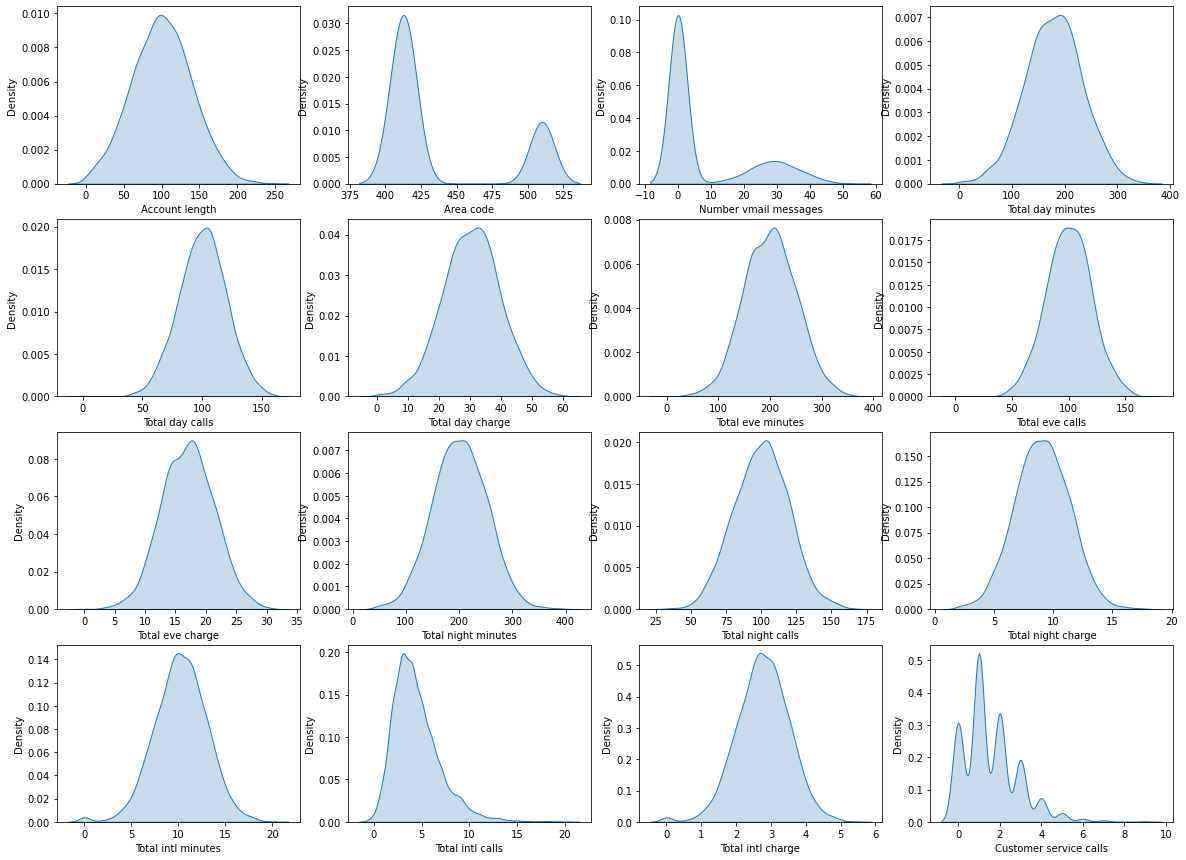

In [59]:
i = 0
j = 0
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(20,15))
for item in num_columns:
    sns.kdeplot(data=df[num_columns],x=item,fill=True,ax=axes[i][j])
    j+=1
    if j>3:
        j=0
        i+=1
        if i>3:
            break


Dari data di atas, terlihat bahwa :
- Secara keseluruhan data terlihat berdistribusi normal
- Area code memiliki 2 puncak 
- Number vmail messages memiliki 2 puncak ,yang diasumsikan dari gambar terlihat seperti berdistibusi right skew
- Total intl calls juga terlihat seperti berdistribusi right skew
- Serta customer service calls memiliki banyak puncak , yang terlihat berdistribusi skew

### Hubungan antara feature dengan target nya

Kita dapat memanfaatkan korelasi menggunakan heatmap , untuk melihat apakah ada korelasi khusus antara masing - masing feature dengan kolom target

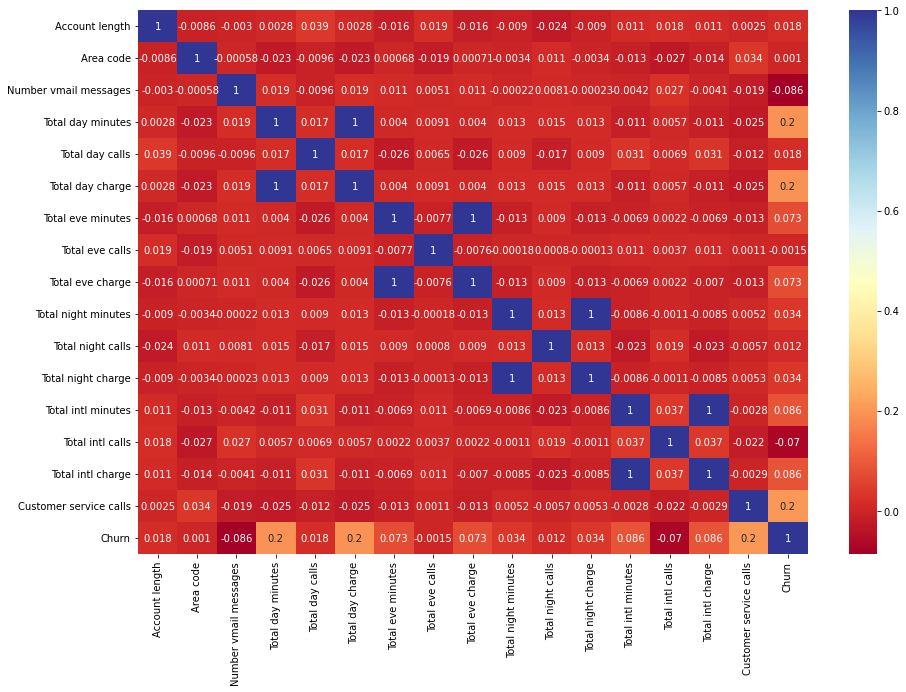

In [60]:
fig,ax = plt.subplots(figsize=(15,10),nrows=1,ncols=1)
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu',ax=ax)
plt.show()

Terlihat bahwa :
- Total day minutes - total day charge memiliki korelasi penuh
- Total eve minutes - total eve charge memiliki korelasi penuh
- Total night minutes - total night charge memiliki korelasi penuh
- Total intl minutes - total intl charge memiliki korelasi penuh

Kita bisa lihat dahulu salah satu visualnya , antara total day minutes dengan total day charge

<AxesSubplot:xlabel='Total day minutes', ylabel='Total day charge'>

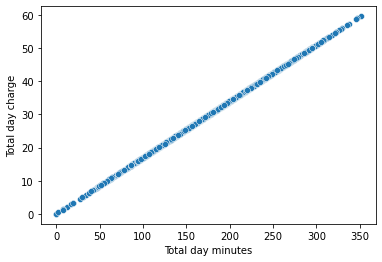

In [61]:
sns.scatterplot(x=df['Total day minutes'],y=df['Total day charge'])

Terlihat bahwa memang data berkorelasi penuh , sehingga akan kita eliminasi ,khususnya kolom total day charge, total eve charge, total night charge, dan total intl charge ,saat feature selection di data preprocessing

### Check Data Outlier -- Menggunakan Box Plot

Sebelum kita melakukan secara spesifik , kita lihat dulu apakah ada outlier , jika memanfaatkan box plot

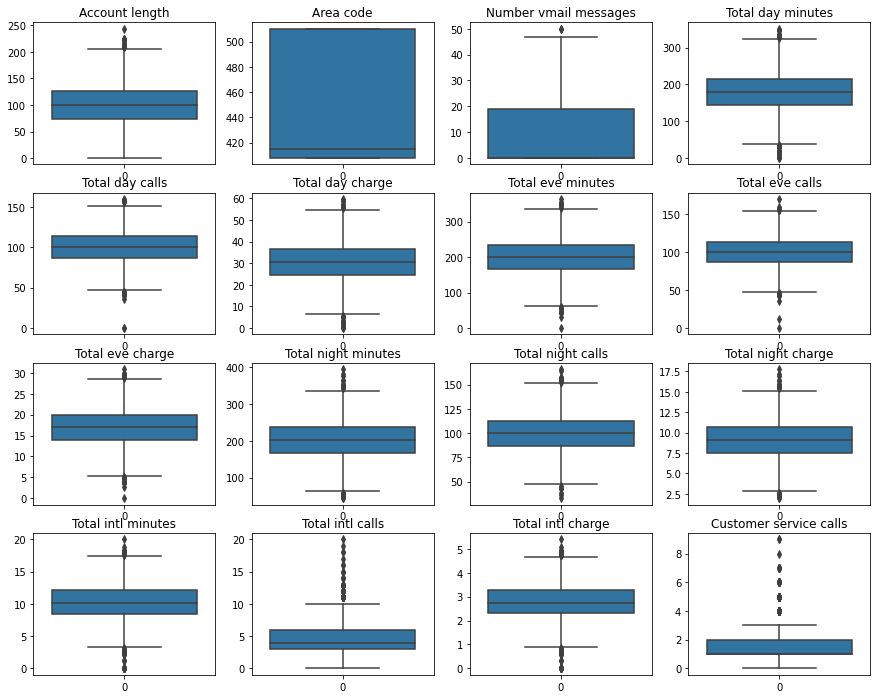

In [62]:
i = 0
j = 0
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(15,12))
for col in num_columns :
    axes[i][j].title.set_text(col)
    sns.boxplot(data=df[col],ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0
        if i > 3:
            break

Dari gambar di atas :

Terlihat bahwa total minutes pada day , eve , night, intl dengan kondisi di bawah lower limit , akan kita lakukan handle outlier. Mengapa ? Karena kondisi outlier pada keempat kolom tersebut diasumsikan bahwa bagaimana bisa total minutes di bawah limit (masih rendah waktu telfon nya), menjadi acuan bahwa pelanggan tersebut berpindah provider (churn = 1) atau tidak. Sehingga saya akan memutuskan untuk menyikapi outlier (lower limit) pada keempat total minutes kolom tersebut

Untuk kolom lain , tidak ada outlier yang perlu dihandle (menurut asumsi saya), karena outlier tersebut secara alami menunjukkan kondisi data aslinya.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Sekarang , kita lakukan convert tipe data terlebih dahulu , untuk kolom Churn , dari True dan False menjadi 1 dan 0

In [63]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


### Train Test Split Dataset

In [64]:
X = df.drop(columns='Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [65]:
num_columns_ = X_train.select_dtypes(exclude=object).columns.tolist()
cat_columns_ = X_train.select_dtypes(include=object).columns.tolist()

In [66]:
num_columns_

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [67]:
cat_columns_

['State', 'International plan', 'Voice mail plan']

Karena num_columns_ mengandung Area code, yang padahal Area code adalah categoric, sehingga akan kita pindahkan ke cat columns 

In [68]:
cat_columns_.append('Area code')
num_columns_.remove('Area code')


In [69]:
num_columns_

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [70]:
cat_columns_

['State', 'International plan', 'Voice mail plan', 'Area code']

In [71]:
X_train.shape,X_test.shape

((2132, 19), (534, 19))

### Handling Outlier

Outlier pada data numerik perlu kita handle (jika ada) , sehingga kita lihat dulu apakah ada outlier pada masing - masing kolom , dengan melihat distribusinya terlebih dahulu

In [72]:
dict_skew = {
    'Normal' : [],
    'Skew' : []
}

for col in num_columns_ :
    if (X_train[col].skew() > 0.5) or (X_train[col].skew() < -0.5):
        dict_skew['Skew'].append(col)
    else:
        dict_skew['Normal'].append(col)

In [73]:
X_train[num_columns_]

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1229,102,0,271.1,80,46.09,172.0,133,14.62,169.2,105,7.61,10.3,5,2.78,1
2001,157,0,240.2,67,40.83,153.0,98,13.01,249.0,72,11.21,10.2,6,2.75,2
1421,79,0,144.0,90,24.48,135.8,91,11.54,212.4,129,9.56,13.0,4,3.51,1
1346,132,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1
86,95,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,70,0,170.2,98,28.93,155.2,102,13.19,228.6,76,10.29,15.0,2,4.05,1
104,61,27,187.5,124,31.88,146.6,103,12.46,225.7,129,10.16,6.4,6,1.73,4
377,41,34,194.4,63,33.05,254.9,110,21.67,160.2,115,7.21,17.2,9,4.64,2
1123,96,0,200.6,117,34.10,289.5,120,24.61,98.3,95,4.42,11.2,5,3.02,2


In [74]:
dict_skew

{'Normal': ['Account length',
  'Total day minutes',
  'Total day calls',
  'Total day charge',
  'Total eve minutes',
  'Total eve calls',
  'Total eve charge',
  'Total night minutes',
  'Total night calls',
  'Total night charge',
  'Total intl minutes',
  'Total intl charge'],
 'Skew': ['Number vmail messages',
  'Total intl calls',
  'Customer service calls']}

Kita dapat lihat bahwa seluruh total minutes masing" (day,eve,night,intl) berdistribusi normal , sehingga pada data ini akan saya handle outliernya.

In [75]:
def lower_limit(data,variables):
    lower_boundary = data[variables].mean() - 3 * data[variables].std()

    return lower_boundary


Sekarang kita lihat lower limit dari masing - masing kolom yang kita ingin handling outliernya

In [76]:
low_limit_day = lower_limit(X_train,'Total day minutes')
print('Total day minutes: ',low_limit_day)

Total day minutes:  16.87918297392804


In [77]:
low_limit_eve = lower_limit(X_train,'Total eve minutes')
print('Total eve minutes: ',low_limit_eve)

Total eve minutes:  47.011772695577974


In [78]:
low_limit_night = lower_limit(X_train,'Total night minutes')
print('Total eve minutes: ',low_limit_night)

Total eve minutes:  48.48212020617896


In [79]:
low_limit_intl = lower_limit(X_train,'Total intl minutes')
print('Total eve minutes: ',low_limit_intl)

Total eve minutes:  1.7939785182206958


Dari hasil masing - masing lower limit di atas , akan kita lihat outliernya ada berapa persen , karena jika masih di bawah 15% ,kita trimming saja.

Kita lihat sekarang berapa persentase outlier pada kolom" tersebut

In [80]:
jumlah_outlier = X_train[X_train['Total eve minutes']<low_limit_eve].shape[0] + X_train[X_train['Total day minutes']<low_limit_day].shape[0] + X_train[X_train['Total night minutes']<low_limit_night].shape[0] + X_train[X_train['Total intl minutes']<low_limit_intl].shape[0]
print("Total jml outlier: ",jumlah_outlier )
print("Persentase jml outlier: ",jumlah_outlier / X_train.shape[0] * 100)

Total jml outlier:  24
Persentase jml outlier:  1.125703564727955


Hasil di atas menunjukkan bahwa 1.12% data yang merupakan outlier pada kolom tersebut , sehingga akan kita coba eliminasi saja

Kita perlu menggabung dulu antara feature dengan label agar yang ke trim 2 2 nya

In [81]:
data_train = pd.concat([X_train,y_train],axis=1)
data_test = pd.concat([X_test,y_test],axis=1)

In [82]:
trimmer = OutlierTrimmer(capping_method="gaussian",tail="left",fold=3,variables=['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes'])
trimmer.fit(data_train)
data_train = trimmer.transform(data_train)
data_test = trimmer.transform(data_test)

In [83]:
data_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1229,MD,102,415,No,No,0,271.1,80,46.09,172.0,133,14.62,169.2,105,7.61,10.3,5,2.78,1,0
2001,MT,157,408,No,No,0,240.2,67,40.83,153.0,98,13.01,249.0,72,11.21,10.2,6,2.75,2,0
1421,TX,79,415,No,No,0,144.0,90,24.48,135.8,91,11.54,212.4,129,9.56,13.0,4,3.51,1,0
1346,NM,132,408,No,No,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1,0
86,AZ,95,408,No,No,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MD,70,408,No,No,0,170.2,98,28.93,155.2,102,13.19,228.6,76,10.29,15.0,2,4.05,1,0
104,MS,61,510,No,Yes,27,187.5,124,31.88,146.6,103,12.46,225.7,129,10.16,6.4,6,1.73,4,1
377,AL,41,510,No,Yes,34,194.4,63,33.05,254.9,110,21.67,160.2,115,7.21,17.2,9,4.64,2,0
1123,AL,96,415,Yes,No,0,200.6,117,34.10,289.5,120,24.61,98.3,95,4.42,11.2,5,3.02,2,0


Data yang dianggap outlier sudah dieliminasi , selanjutnya bisa kita kembali ke handling missing values

### Handling Missing Values

Pada dataset ini, mengingat missing values tidak tersedia , maka tahapan ini akan kita skip ke tahapan selanjutnya

### Feature Selection

Sebelum memanfaatkan feature importance , saya akan melakukan dropping , dimana

 'Total day charge','Total eve charge', 'Total night charge', 'Total intl charge' 
 
 adalah kolom yang berkorelasi penuh terhadap total minutes nya.

In [84]:
data_train = data_train.drop(columns=['Total day charge','Total eve charge', 'Total night charge', 'Total intl charge'],axis=1)
data_test = data_test.drop(columns=['Total day charge','Total eve charge', 'Total night charge', 'Total intl charge'],axis=1)

Saya akan memanfaatkan Random Forest Classification Feature Importance, dalam kata lain, saya akan melihat mana yang menjadi prioritas sebagai kolom feature, sehingga meminimalisir jumlah kolom sehingga model lebih cepat & mudah mempelajari dataset

### Feature Selection 2 : Feature Importance

In [85]:
X = data_train.drop(columns=['Churn'],axis=1)
y = data_train['Churn']

Sebelum kita bisa melanjutkan ke feature importance ini, kita lakukan label encoding terhadap data yang bersifat kategorik , karena randomForestClassifier hanya bisa melakukan feature importance pada data yang bersifat numerik

In [86]:
encoder = LabelEncoder()

for columns in X :
    if X[columns].dtypes == 'object':
        X[columns] = encoder.fit_transform(X[columns])

In [87]:
X[:5]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
1229,20,102,415,0,0,0,271.1,80,172.0,133,169.2,105,10.3,5,1
2001,26,157,408,0,0,0,240.2,67,153.0,98,249.0,72,10.2,6,2
1421,43,79,415,0,0,0,144.0,90,135.8,91,212.4,129,13.0,4,1
1346,32,132,408,0,0,0,169.9,107,209.4,121,206.1,79,11.5,2,1
86,3,95,408,0,0,0,238.1,65,187.2,98,190.0,115,11.8,4,4


Data bertipe object sudah selesai di encoding ke dalam bentuk numerik. Sehingga kita bisa melakukan feature importance pada model randomforestclassifier


In [88]:
model = RandomForestClassifier()

model.fit(X,y)

importance = model.feature_importances_

In [89]:
i = 0
for item in X :
    print(f'Feature importance dari {item} : {importance[i]}')
    i +=1

Feature importance dari State : 0.044176131441776414
Feature importance dari Account length : 0.04949216022317358
Feature importance dari Area code : 0.012995346154748049
Feature importance dari International plan : 0.08879609227999496
Feature importance dari Voice mail plan : 0.01663031628072935
Feature importance dari Number vmail messages : 0.019312530870039604
Feature importance dari Total day minutes : 0.22851181461274744
Feature importance dari Total day calls : 0.04752149054029941
Feature importance dari Total eve minutes : 0.08546903819058434
Feature importance dari Total eve calls : 0.044853561279466894
Feature importance dari Total night minutes : 0.05999554563153287
Feature importance dari Total night calls : 0.04751775570398161
Feature importance dari Total intl minutes : 0.0764874543230457
Feature importance dari Total intl calls : 0.05575647373510858
Feature importance dari Customer service calls : 0.12248428873277112


In [90]:
fi_table = pd.DataFrame(data={'column':X.columns.tolist(),'feature_importance':importance})
fi_table

,column,feature_importance
0,State,0.044176
1,Account length,0.049492
2,Area code,0.012995
3,International plan,0.088796
4,Voice mail plan,0.016630
5,Number vmail messages,0.019313
6,Total day minutes,0.228512
7,Total day calls,0.047521
8,Total eve minutes,0.085469
9,Total eve calls,0.044854


Saya akan memanfaatkan threshold 0.049 , sehingga kolom yang feature importance yang dibawah 0.049 , akan dieliminasi saja

In [91]:
fi_table[fi_table['feature_importance']<0.049]

,column,feature_importance
0,State,0.044176
2,Area code,0.012995
4,Voice mail plan,0.016630
5,Number vmail messages,0.019313
7,Total day calls,0.047521
9,Total eve calls,0.044854
11,Total night calls,0.047518


Terlihat bahwa ada 5 kolom yang feature_importance nya di bawah 0.049 : 

State, Area code, Voice mail plan , Number vmail messages , Total eve calls

Kita lakukan drop pada kolom ini untuk memperoleh feature yang feature_importancenya di atas threshold 0.05

In [92]:
data_train = data_train.drop(columns=['State','Area code','Voice mail plan','Number vmail messages','Total eve calls'],axis=1)
data_test = data_test.drop(columns=['State','Area code','Voice mail plan','Number vmail messages','Total eve calls'],axis=1)

Split kembali data_train dan data_test terhadap masing - masing target column nya

In [93]:
X_train = data_train.drop(columns='Churn',axis=1)
X_test = data_test.drop(columns='Churn',axis=1)
y_train = data_train['Churn']
y_test = data_test['Churn']

In [94]:
X_train

,Account length,International plan,Total day minutes,Total day calls,Total eve minutes,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
1229,102,No,271.1,80,172.0,169.2,105,10.3,5,1
2001,157,No,240.2,67,153.0,249.0,72,10.2,6,2
1421,79,No,144.0,90,135.8,212.4,129,13.0,4,1
1346,132,No,169.9,107,209.4,206.1,79,11.5,2,1
86,95,No,238.1,65,187.2,190.0,115,11.8,4,4
...,...,...,...,...,...,...,...,...,...,...
66,70,No,170.2,98,155.2,228.6,76,15.0,2,1
104,61,No,187.5,124,146.6,225.7,129,6.4,6,4
377,41,No,194.4,63,254.9,160.2,115,17.2,9,2
1123,96,Yes,200.6,117,289.5,98.3,95,11.2,5,2


In [96]:
num_columns_train_importance = X_train.drop(columns='International plan',axis=1).columns.tolist()
cat_columns_train_importance = ['International plan']

### Feature Scaling

Feature scaling hanya kita lakukan pada data yang bersifat numerik , sehingga international plan kita lakukan dropping terlebih dahulu

In [97]:
scaler = StandardScaler()

ct = ColumnTransformer(transformers=[('numeric',scaler,num_columns_train_importance)])

X_train_scaled = ct.fit_transform(X_train)   
X_test_scaled = ct.transform(X_test)   

### Feature Encoding

Tadi kita sudah melakukan scaling terhadap data numerik , sekarang kita lakukan encoding terhadap data kategorik , yaitu kolom international plan

In [98]:
ohe = OneHotEncoder(sparse=False)

ct_encode = ColumnTransformer(transformers=[('categoric',ohe,['International plan'])])

X_train_encoded = ct_encode.fit_transform(X_train)   
X_test_encoded = ct_encode.transform(X_test)  

In [99]:
X_train_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Menggabungkan data hasil scaling + encoding

In [100]:
X_train_final = np.concatenate([X_train_scaled,X_train_encoded],axis=1)
X_test_final = np.concatenate([X_test_scaled,X_test_encoded],axis=1)

Kita lihat bentuk datanya seperti apa setelah digabung :

In [101]:
X_train_final[1]

array([ 1.42187701,  1.12184546, -1.67597537, -0.94192898,  0.94436221,
       -1.46492639, -0.03699766,  0.61939519,  0.32580093,  1.        ,
        0.        ])

### SMOTENC - Untuk Imbalance Dataset

Dapat kita lihat, bahwa sebelumnya saat EDA, komposisi dataset atas label 0 dan 1 pada Churn terlihat tidak seimbang , sehingga kita perlu untuk mengimbanginya , dengan memanfaatkan SMOTE, khususnya SMOTENC dengan konsep oversampling pada minor label.

In [102]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42,categorical_features=[8,9])
X_train_final_resampled ,y_train_final_resampled = sm.fit_resample(X_train_final,y_train)

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



Karena memanfaatkan klasifikasi , kita coba gunakan 4 algoritma , yaitu :

1. Logistic Regression
2. Support Vector Machines
3. K-Neares Neighbors
4. Random Forest Classifiers

In [103]:
logreg = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# 7. Model Training

Kita lakukan pelatihan model dengan menggunakan data train

In [104]:
logreg.fit(X_train_final_resampled,y_train_final_resampled)
svm.fit(X_train_final_resampled,y_train_final_resampled)
knn.fit(X_train_final_resampled,y_train_final_resampled)
rf.fit(X_train_final_resampled,y_train_final_resampled)

RandomForestClassifier()

# 8. Model Evaluation

Sekarang kita lihat , bagaimana hasil masing - masing model. Base model ini akan kita lihat performanya , mana yang lebih baik sehingga akan dilakukan hyperparameter tuning sehingga meningkatkan metrics model

 Target yang kita inginkan adalah , menghasilkan recall sebesar mungkin, karena rumus recall = TP / (TP + FN) ,yang berarti semakin sedikit False Negative (atau mendekati 0), maka nilai recall mendekati 1


Kemudian , untuk cross validation score 

### Logistic Regression - Menggunakan Data Imbalance

In [105]:
cross_val_logreg = cross_val_score(logreg,X_train_final_resampled,y_train_final_resampled,scoring='f1',cv=5)
print("All Cross val score :",cross_val_logreg)
print("Mean Cross val score :",cross_val_logreg.mean())
print("Std Cross val score :",cross_val_logreg.std())
print("Range Cross val score :",cross_val_logreg.mean()-cross_val_logreg.std(),'-',cross_val_logreg.mean()+cross_val_logreg.std())

All Cross val score : [0.77653631 0.78201635 0.77793103 0.78382148 0.78213802]
Mean Cross val score : 0.78048863976903
Std Cross val score : 0.0027685523446802163
Range Cross val score : 0.7777200874243498 - 0.7832571921137103


Terlihat bahwa setelah dilakukan handling imbalance dataset, cross validation score pada f1 menunjukkan kenaikkan yang signifikan. Sehingga imbalance dataset cukup penting pada kondisi dataset yang seperti ini. Sehingga untuk model lain kita juga akan manfaatkan data train yang telah dihandle untuk training model

Dari hasil cross val di atas , terlihat bahwa nilai crossval score cukup tinggi , didukung dengan kondisi standar deviasi yang mendekati 0 , yang artinya cross val score konsisten memiliki hasil yang berdekatan. Tetapi kita akan coba lihat dahulu , dari sisi classification report nya seperti apa

In [106]:
y_pred_test = logreg.predict(X_test_final)

print("Classification Report Logistic Regression: ")
print(classification_report(y_test,y_pred_test))

Classification Report Logistic Regression: 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       450
           1       0.32      0.65      0.43        77

    accuracy                           0.75       527
   macro avg       0.62      0.71      0.63       527
weighted avg       0.84      0.75      0.78       527



Dari churn 0 ,menunjukkan bahwa baik precision dan recall menunjukkan hasil yang baik. 

Akan tetapi pada churn 1 , precisionnya kecil , di kisaran 32% , yang artinya False Positive lebih banyak daripada True Positive.

Untuk recall pada churn 1, recallnya di kisaran 65% , yang artinya True Positive masih lebih banyak dari False Negativenya

Tujuan kita adalah dari yang benar - benar Churn , seberapa persen yang terprediksi bahwa benar - benar Churn , yang artinya, kita ingin menaikkan recall (True Positive > False Negative). Karena , kita mau agar kita bisa menemukan yang benar - benar Churn agar bisa langsung diberikan service / response khusus terhadap yang Churn tersebut. 

Akan tetapi kita juga ingin melihat hasil precision yang tinggi. Karena kita juga tidak mau bahwa yang False Positive (terprediksi positif padahal negatif) nya banyak, karena akan mengganggu / salah melakukan treatment pada orang yang tidak churn

Selanjutnya kita lihat untuk SVM

### Support Vector Machine

In [107]:
cross_val_svm = cross_val_score(svm,X_train_final_resampled,y_train_final_resampled,scoring='f1',cv=5)
print("All Cross val score :",cross_val_svm)
print("Mean Cross val score :",cross_val_svm.mean())
print("Std Cross val score :",cross_val_svm.std())
print("Range Cross val score :",cross_val_svm.mean()-cross_val_svm.std(),'-',cross_val_svm.mean()+cross_val_svm.std())

All Cross val score : [0.87359551 0.89473684 0.90014065 0.89367816 0.8861454 ]
Mean Cross val score : 0.8896593120565589
Std Cross val score : 0.009188952733958235
Range Cross val score : 0.8804703593226006 - 0.8988482647905172


Dari cross validation score, terlihat bahwa menunjukkan hasil yang cukup tinggi , dengan standar deviasi yang konsisten . Akan tetapi , kita perlu lihat dahulu hasil pada classification reportnya

In [108]:
y_pred_test = svm.predict(X_test_final)

print("Classification Report Support Vector Machine: ")
print(classification_report(y_test,y_pred_test))

Classification Report Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       450
           1       0.54      0.66      0.60        77

    accuracy                           0.87       527
   macro avg       0.74      0.78      0.76       527
weighted avg       0.88      0.87      0.87       527



Pada hasil report di atas , terlihat bahwa secara precision dan recall baik pada label 0 dan 1 , memiliki hasil yang lebih baik daripada Logistic Regression , sehingga untuk model ini dapat dipertimbangkan untuk digunakan. Ditambah, kondisi accuracy f1-score nya berada di range pada cross validation scorenya

### K-Nearest Neighbors

In [109]:
cross_val_knn = cross_val_score(knn,X_train_final_resampled,y_train_final_resampled,scoring='f1',cv=5)
print("All Cross val score :",cross_val_knn)
print("Mean Cross val score :",cross_val_knn.mean())
print("Std Cross val score :",cross_val_knn.std())
print("Range Cross val score :",cross_val_knn.mean()-cross_val_knn.std(),'-',cross_val_knn.mean()+cross_val_knn.std())

All Cross val score : [0.87926509 0.90649351 0.9079118  0.91050584 0.89144317]
Mean Cross val score : 0.8991238810183144
Std Cross val score : 0.011953683381921083
Range Cross val score : 0.8871701976363934 - 0.9110775644002355


Dari cross validation score, dapat dilihat bahwa nilai f1-scorenya lebih tinggi lagi dibandingkan support vector machine . Tetapi apakah diikuti juga dengan hasil classification report yang baik?

In [110]:
y_pred_test = knn.predict(X_test_final)

print("Classification Report K-Nearest Neighbors: ")
print(classification_report(y_test,y_pred_test))

Classification Report K-Nearest Neighbors: 
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       450
           1       0.42      0.64      0.51        77

    accuracy                           0.82       527
   macro avg       0.68      0.74      0.70       527
weighted avg       0.86      0.82      0.83       527



Dari hasil classification report, ternyata accuracy f1-score nya berada di bawah cross validation scorenya ,  kemudian jika dilihat dari precisionnya, tidak sebaik dibandingkan dengan support vector machine. 

Kita lihat lagi untuk model selanjutnya, Random Forest Classifier

### Random Forest Classifier

In [111]:
cross_val_rf = cross_val_score(rf,X_train_final_resampled,y_train_final_resampled,scoring='f1',cv=5)
print("All Cross val score :",cross_val_rf)
print("Mean Cross val score :",cross_val_rf.mean())
print("Std Cross val score :",cross_val_rf.std())
print("Range Cross val score :",cross_val_rf.mean()-cross_val_rf.std(),'-',cross_val_rf.mean()+cross_val_rf.std())

All Cross val score : [0.90469417 0.94360385 0.94545455 0.9248227  0.93793103]
Mean Cross val score : 0.9313012588538239
Std Cross val score : 0.0151362631561679
Range Cross val score : 0.916164995697656 - 0.9464375220099918


Menariknya , cross validation score ini menghasilkan range tertinggi , dibandingkan dengan tiga model sebelumnya. Tetapi , perlu kita ingat bahwa hasil classification report belum tentu sejajar dengan range cross validation scorenya. Sehingga, kita lihat dahulu bagaimana kondisi cross validation score nya

In [112]:
y_pred_test = rf.predict(X_test_final)

print("Classification Report Random Forest Classifier: ")
print(classification_report(y_test,y_pred_test))

Classification Report Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       450
           1       0.71      0.73      0.72        77

    accuracy                           0.92       527
   macro avg       0.83      0.84      0.83       527
weighted avg       0.92      0.92      0.92       527



Ternyata, pada kasus ini Random Forest Classifier memiliki hasil yang lebih menarik daripada ketiga model lainnya. Kondisi precision dan recall saat label nya = 1 cukup baik dibandingkan ketiga model lainnya. Kemudian untuk f1-score accuracy nya , juga lebih baik karena berada pada kondisi range cross validation score nya. Sehingga yang akan kita lakukan model improvement juga Random Forest Classifier saja

### Model Improvement - Random Forest Classifier

Kita lakukan Model Improvement , khususnya pada Random Forest Classifier . Kita akan manfaatkan Pipeline serta GridSearchCV , untuk melihat dari pilihan parameter yang ada , yang mana yang terbaik.

In [113]:
num_pipeline = make_pipeline(scaler)
cat_pipeline = make_pipeline(ohe)

data_pipeline = ColumnTransformer([
        ('pipe_num',num_pipeline,num_columns_train_importance),
        ('pipe_cat',cat_pipeline,cat_columns_train_importance)
])

final_pipeline = Pipeline([
        ('data_pipe',data_pipeline),
        ('smotenc',sm),
        ('rf',rf)
])

Sekarang kita sudah berhasil membuat final pipeline yang berisi preprocessing data (kecuali handling outlier). Selanjutnya , kita coba manfaatkan pipeline tersebut ke dalam grid search cv (kombinasi pipeline dengan gridsearchcv)

In [114]:
parameters = {
    'rf__n_estimators':(10,50,100,250,500),
    'rf__max_depth': (50,150,250),
    'rf__min_samples_split':(2,3),
    'rf__min_samples_leaf':(1,2,3)
}

grid_pipe = GridSearchCV(final_pipeline,param_grid=parameters,cv=5)
grid_pipe.fit(X_train,y_train)
print("Best parameters : {}".format(grid_pipe.best_params_))

Best parameters : {'rf__max_depth': 50, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 3, 'rf__n_estimators': 50}


Setelah melakukan gridsearchcv dengan pipeline , kita lihat parameter terbaik diantara list parameter di atas

In [115]:
grid_pipe.best_params_

{'rf__max_depth': 50,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 50}

Di atas merupakan hasil parameter terbaik yang dimiliki model , dengan asumsi diantara menggunakan gridsearch tersebut. Sekarang grid search terbaik akan kita manfaatkan

In [116]:
grid_pipe_best = grid_pipe.best_estimator_

Kita coba train model dengan pipeline serta parameter model yang sudah diambil berdasarkan yang terbaik

In [117]:
grid_pipe_best.fit(X_train,y_train)

Pipeline(steps=[('data_pipe',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total eve minutes',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Customer service calls']),
                                                 ('pipe_cat',
                     

Kita coba liat hasil y_test menurut model untuk dilihat classification report nya

In [118]:
y_test_pred = grid_pipe_best.predict(X_test)

Setelah mendapatkan hasil prediksi y_test_pred untuk dibandingkan dengan y_test nya , sekarang kita lihat hasilnya seperti apa

In [119]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       450
           1       0.71      0.74      0.73        77

    accuracy                           0.92       527
   macro avg       0.83      0.84      0.84       527
weighted avg       0.92      0.92      0.92       527



Dari hasil pemanfaatan grid search cv pipeline di atas :
- Hasilnya menunjukkan bahwa dibandingkan tanpa menggunakan gridsearch cv , hasil tidak begitu berbeda

Sekarang kita lihat bagaimana roc_auc_score nya

In [130]:
print(roc_auc_score(y_test,y_test_pred))

0.8445743145743145


Dari segi roc_auc_score , bahkan model gridsearchcv pipeline ini memberikan nilai 84% , dimana yang berarti model ini cukup dapat diandalkan untuk melakukan prediksi pelanggan akan Churn atau tidak

# 9. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

Kita sudah mengetahui :
1. Memanfaatkan model ketika kondisi data sebelum dilakukan feature scaling dan encoding. Dalam arti lain , kondisi data yang diinput adalah kondisi data yang sudah dilakukan feature selection.
2. Setelah menggunakan gridsearch cv untuk menemukan parameter yang baik pada model pipeline tadi , kita gunakan pipeline dengan best parameters
3. Memanfaatkan pickle (import pickle) untuk dapat menyimpan grid_pipe_best tersebut

In [120]:
# with open ("model_gridpipeline.pkl","wb") as f :
#     pickle.dump(grid_pipe_best,f)

# 10. Model Inference

Kita coba gunakan model kita ,apakah bisa memprediksi atau tidak.

In [127]:
y_pred_inf = grid_pipe_best.predict(X_test[:15])
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [128]:
y_test[:15]

1396    0
542     0
2275    0
1302    0
560     0
778     0
1730    0
2191    0
986     0
459     0
17      0
1173    1
1604    0
2537    0
302     1
Name: Churn, dtype: int64

Dengan memanfaatkan data inference dari X_test, dapat kita lihat bahwa dari 15 data tes awal , model bisa memprediksi cukup baik.

# 11. Pengambilan Kesimpulan

Berdasarkan data yang diambil dari https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets dengan nama dataset churn-bigml-80.csv :

1. Dataset berkomposisi feature apa saja yang mempengaruhi pelanggan (anggap saja pelanggan provider seluler) untuk berpindah provider (Churn) dimana jika Churn nya True artinya 1 ,dan False artinya 0 . Dengan artian lain bahwa Churn = 1 berarti orang berpotensi pindah , dengan diberikan feature spt di atas
2. Akan tetapi , karena kondisi label yang imbalance antara Churn True dan False, nantinya perlu kita handling imbalance terlebih dahulu sehingga model dapat belajar untuk membaca dengan tepat mana yang seharusnya True atau False. 
3. Kemudian untuk data outlier ada tabel total minutes terendah yang saya hapus outliernya , mengapa ? karena jika data yang berada di lower limit memiliki hasil label yang homogen, itu artinya value dari kolom tersebut akan cukup mengganggu cara model bekerja
4. Melakukan feature selection dengan feature importance dari RandomForestClassifier.featureimportance untuk memilih dengan baik, jika ada dataset dengan kasus seperti ini, kolom mana yang benar - benar lebih berpartisipasi penuh dalam keputusan hasil model
5. Melakukan scaling dan encoding
6. Melakukan uji model dengan 4 model , yaitu Logistic Regression , Support Vector Machine , KNN , dan RandomForestClassifier
7. Dari keseluruhan model yang digunakan , saat menampilkan f1-score accuracy, yang memiliki f1-score accuracy berada di range cross validation score dengan scoring f1, adalah model yang dianggap konsisten / berada di jalurnya. Kemudian , yang memiliki precision dan recall cukup tinggi saat Churn = 1, juga menjadi pertimbangan lebih. Dan model yang sesuai dengan requirement tersebut adalah Random Forest Classifier
8. Setelah memilih model Random Forest Classifier , kita coba uji dengan gridsearchcv , dan ternyata parameter terbaik yang terpilih juga tidak begitu menghasilkan perbedaan yang signifikan
9. Model diuji dengan 15 data test awal , dan hasil nya cukup baik karena dapat memprediksi sesuai dengan kejadian aslinya pada y_test 